### **건강보험공단 질병예측정보 api**  
* 질병코드: 1-감기, 2-눈병, 3-식중독, 4-피부염  
* 위험도: 1-관심, 2-주의, 3-경고, 4-위험
* 시도 지역코드: 11	서울,
26	부산,
27	대구,
28	인천,
29	광주,
30	대전,
31	울산,
41	경기,
42	강원,
43	충북,
44	충남,
45	전북,
46	전남,
47	경북,
48	경남,
49	제주,
99	전국  


API 설명:	예측 진료정보(질병, 일자, 지역별로 예측진료건수, 예측위험도, 행동요령)를 제공.
- 시도별, 시군구별로 질병별 예측진료정보 조회.
- 감기, 눈병, 식중독, 피부염 질환의 경우, 조회일, 조회일 1일 후, 조회일 2일 후 예측진료정보 총 3일 데이터 제공


 응답 메시지 명세:   

  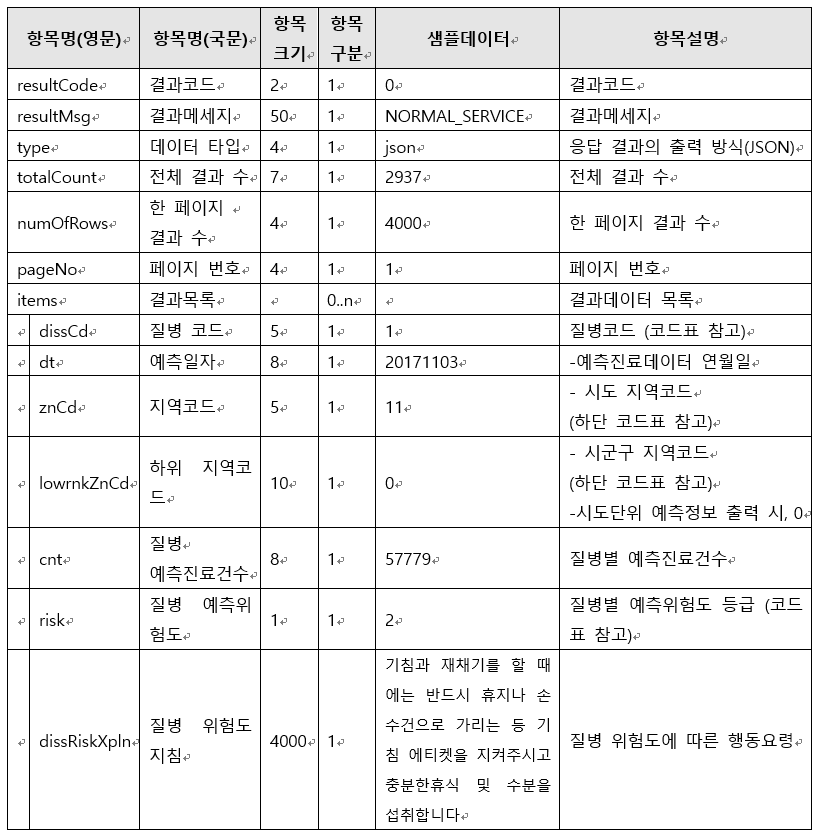

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

import requests
import pprint
import json

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'C:/Windows/Fonts/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)           # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
# 일반 인증키(Encoding)

url1 = f'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo?serviceKey={service_key}&numOfRows=1000&pageNo=1&type=json&dissCd=1&znCd='
url2 = f'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo?serviceKey={service_key}&numOfRows=1000&pageNo=1&type=json&dissCd=2&znCd='
url3 = f'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo?serviceKey={service_key}&numOfRows=1000&pageNo=1&type=json&dissCd=3&znCd='
url4 = f'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo?serviceKey={service_key}&numOfRows=1000&pageNo=1&type=json&dissCd=4&znCd='

In [ ]:
response1 = requests.get(url1); contents1 = response1.text
response2 = requests.get(url2); contents2 = response2.text
response3 = requests.get(url3); contents3 = response3.text
response4 = requests.get(url4); contents4 = response4.text

In [ ]:
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents1))

('{\n'
 '  "response" : {\n'
 '    "header" : {\n'
 '      "resultCode" : 0,\n'
 '      "resultMsg" : "NORMAL_SERVICE",\n'
 '      "type" : "json"\n'
 '    },\n'
 '    "body" : {\n'
 '      "items" : [ {\n'
 '        "dissCd" : "1",\n'
 '        "dt" : "20240310",\n'
 '        "znCd" : "11",\n'
 '        "lowrnkZnCd" : "0",\n'
 '        "cnt" : 18400,\n'
 '        "risk" : 1,\n'
 '        "dissRiskXpln" : "환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 '
 '씻기를 생활화합니다."\n'
 '      }, {\n'
 '        "dissCd" : "1",\n'
 '        "dt" : "20240310",\n'
 '        "znCd" : "26",\n'
 '        "lowrnkZnCd" : "0",\n'
 '        "cnt" : 6708,\n'
 '        "risk" : 1,\n'
 '        "dissRiskXpln" : "환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 '
 '씻기를 생활화합니다."\n'
 '      }, {\n'
 '        "dissCd" : "1",\n'
 '        "dt" : "20240310",\n'
 '        "znCd" : "27",\n'
 '        "lowrnkZnCd" : "0",\n'
 '        "cnt" : 3933,\n'
 '        "risk" : 1,\n'
 '        "dissRiskXpln" : "환기를 자주 시켜 깨끗한 환경을 

In [ ]:
# 문자열 json파일로 변환
json_ob1 = json.loads(contents1)
json_ob2 = json.loads(contents2)
json_ob3 = json.loads(contents3)
json_ob4 = json.loads(contents4)
print(json_ob1)
print(type(json_ob1))

{'response': {'header': {'resultCode': 0, 'resultMsg': 'NORMAL_SERVICE', 'type': 'json'}, 'body': {'items': [{'dissCd': '1', 'dt': '20240310', 'znCd': '11', 'lowrnkZnCd': '0', 'cnt': 18400, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '26', 'lowrnkZnCd': '0', 'cnt': 6708, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '27', 'lowrnkZnCd': '0', 'cnt': 3933, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '28', 'lowrnkZnCd': '0', 'cnt': 3827, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '29', 'lowrnkZnCd': '0', 'cnt': 3194, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', '

In [ ]:
# 필요한 값만 가져오기
body1 = json_ob1['response']['body']['items']
body2 = json_ob2['response']['body']['items']
body3 = json_ob3['response']['body']['items']
body4 = json_ob4['response']['body']['items']
print(body1)

[{'dissCd': '1', 'dt': '20240310', 'znCd': '11', 'lowrnkZnCd': '0', 'cnt': 18400, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '26', 'lowrnkZnCd': '0', 'cnt': 6708, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '27', 'lowrnkZnCd': '0', 'cnt': 3933, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '28', 'lowrnkZnCd': '0', 'cnt': 3827, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '29', 'lowrnkZnCd': '0', 'cnt': 3194, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'}, {'dissCd': '1', 'dt': '20240310', 'znCd': '30', 'lowrnkZnCd': '0', 'cnt': 4865, 'risk': 1, 'dissRiskXpln': '환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 

In [ ]:
# 추출된 값을 dataframe으로 변환
import pandas as pd
from pandas import json_normalize

df1 = json_normalize(body1)
df2 = json_normalize(body2)
df3 = json_normalize(body3)
df4 = json_normalize(body4)
print(df1)

   dissCd        dt znCd lowrnkZnCd     cnt  risk  \
0       1  20240310   11          0   18400     1   
1       1  20240310   26          0    6708     1   
2       1  20240310   27          0    3933     1   
3       1  20240310   28          0    3827     1   
4       1  20240310   29          0    3194     1   
5       1  20240310   30          0    4865     1   
6       1  20240310   31          0    3523     1   
7       1  20240310   41          0   19714     1   
8       1  20240310   42          0    3003     1   
9       1  20240310   43          0    3452     1   
10      1  20240310   44          0    7108     1   
11      1  20240310   45          0    3988     1   
12      1  20240310   46          0    8608     1   
13      1  20240310   47          0    8434     1   
14      1  20240310   48          0    9066     1   
15      1  20240310   49          0    1773     1   
16      1  20240310   99          0  109605     1   
17      1  20240311   11          0   71543   

In [ ]:
df1.shape, df2.shape, df3.shape, df4.shape

((51, 7), (51, 7), (51, 7), (51, 7))

In [ ]:
# unique values  1-감기
for col in df1.columns:
  print(col, ": ", df1[col].unique())

dissCd :  ['1']
dt :  ['20240310' '20240311' '20240312']
znCd :  ['11' '26' '27' '28' '29' '30' '31' '41' '42' '43' '44' '45' '46' '47'
 '48' '49' '99']
lowrnkZnCd :  ['0']
cnt :  [ 18400   6708   3933   3827   3194   4865   3523  19714   3003   3452
   7108   3988   8608   8434   9066   1773 109605  71543  38695  26340
  35857  14386  17504  13703 145467  16123  16482  27989  18625  21475
  30271  37134   7131 538732  87328  27341  17295  18403  10898  11725
   8925  83579   9234  10371  15768  13452  15248  19699  26852   4390
 380515]
risk :  [1 2 3 4]
dissRiskXpln :  ['환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 손 씻기를 생활화합니다.'
 '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'
 '발열이나 호흡기 증상이 있다면 외출을 삼가되 외출시에는 마스크를 착용하고 가까운 의료기관에 방문하여 전문의의 진료를 받습니다.'
 '고위험 집단(만성심장폐질환, 천식, 당뇨병 환자, 임산부, 65세 이상 어르신 등)은 중증으로 진행될 수 있으므로 발열, 호흡기 증상이 있으면 인근 의료기관에서 바로 진료를 받으시기 바랍니다.']


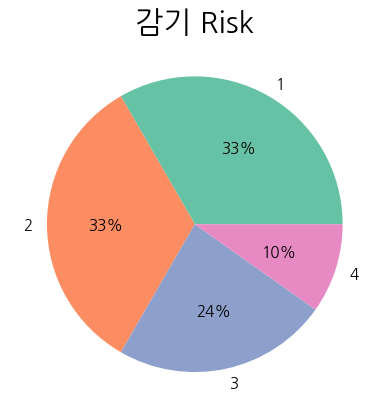

In [ ]:
risk = df1['risk'].value_counts()
plt.title("감기 Risk")
plt.pie(x=risk, labels=risk.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11});

In [ ]:
# unique values  2-눈병
for col in df2.columns:
  print(col, ": ", df2[col].unique())

dissCd :  ['2']
dt :  ['20240310' '20240311' '20240312']
znCd :  ['11' '26' '27' '28' '29' '30' '31' '41' '42' '43' '44' '45' '46' '47'
 '48' '49' '99']
lowrnkZnCd :  ['0']
cnt :  [  383   329   137   125    94    96    72   604    60   122   106   227
   116   121   143    48  2792  2508  3271  2739  2139  1172  1552  1015
 10400  1351  1434  1980  2202  1709  2725  3528   714 40446  8375  2910
  2299  1764   961  1189   763  8647  1160  1273  1596  1843  1494  2351
  2581   584 39797]
risk :  [1 3 2]
dissRiskXpln :  ['비누를 사용하여 흐르는 수돗물에 손을 자주 씻고, 손으로 얼굴, 특히 눈 주위를 만지지 않도록 합니다.'
 '눈에 부종, 충혈, 이물감 등이 있을 경우에는 손으로 비비거나 만지지 말고 안과 전문의의 진료를 받고 사람들이 많이 모이는 장소는 피하도록 합니다.'
 '비누를 사용하여 흐르는 수돗물에 손을 자주 씻고, 수건이나 개인 소지품 등은 다른 사람과 함께 사용하지 않습니다.']


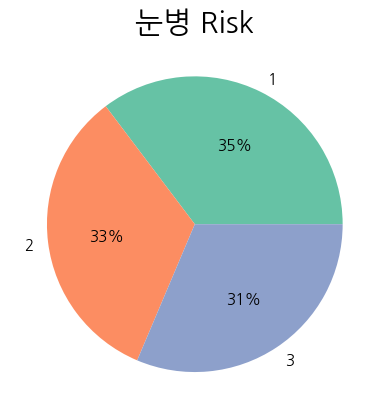

In [ ]:
risk = df2['risk'].value_counts()
plt.title("눈병 Risk")
plt.pie(x=risk, labels=risk.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11});

In [ ]:
# unique values  3-식중독
for col in df3.columns:
  print(col, ": ", df3[col].unique())

dissCd :  ['3']
dt :  ['20240310' '20240311' '20240312']
znCd :  ['11' '26' '27' '28' '29' '30' '31' '41' '42' '43' '44' '45' '46' '47'
 '48' '49' '99']
lowrnkZnCd :  ['0']
cnt :  [  4202   2079   1026   1922   1009   1340    948   8133    708   1154
   1739   1206   1085   1421   1772    483  30238   4632   8762   5501
   8739   3697   4275   2766  34884   2782   3685   5317   5544   3882
   5602   8675   1851 110599  24427   8427   4484   7061   3071   3564
   2439  30343   2302   3165   4488   4651   3193   4426   6816   1549
 114413]
risk :  [1 3 2]
dissRiskXpln :  ['식중독 발생가능성은 낮으나 식중독예방에 지속적인 관심이 요망됩니다. 화장실 사용 후, 귀가 후, 조리 전에 손 씻기를 생활화 합시다.'
 '식중독 발생가능성이 높으므로 식중독예방에 경계가 요망됩니다. 조리도구는 세척, 소독 등을 거쳐 세균오염을 방지하고 유통기한, 보관방법 등을 확인하여 음식물 조리.보관에 각별히 주의하여야 합니다.'
 '식중독 발생가능성이 중간 단계이므로 식중독예방에 주의가 요망됩니다. 조리음식은 중심부까지 75℃(어패류 85℃) 1분 이상 완전히 익히고 외부로 운반하실 때에는 가급적 아이스박스 등을 이용하여 10℃이하에서 보관.운반 합니다.']


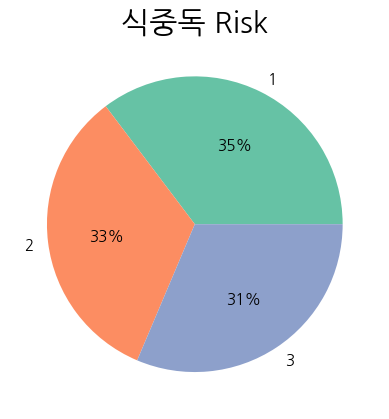

In [ ]:
risk = df3['risk'].value_counts()
plt.title("식중독 Risk")
plt.pie(x=risk, labels=risk.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11});

In [ ]:
# unique values 4-피부염
for col in df4.columns:
  print(col, ": ", df4[col].unique())

dissCd :  ['4']
dt :  ['20240310' '20240311' '20240312']
znCd :  ['11' '26' '27' '28' '29' '30' '31' '41' '42' '43' '44' '45' '46' '47'
 '48' '49' '99']
lowrnkZnCd :  ['0']
cnt :  [ 1021   319   591   410   242   285   313  3358   168   349   496   310
   636   590   516    44  9655  2945  3059  2530  3016  1558  1386  1297
 11559  1219  1884  2660  2404  2473  3126  3792   589 45503  7815  3403
  1896  2052  1194  1006   881  8287   843  1475  1892  1565  1912  2162
  2713 39512]
risk :  [1 3 4 2]
dissRiskXpln :  ['기관지 자극 요인인 흡연, 찬바람, 찬음식 등과 급격한 온도변화는 피합니다.'
 '급격한 온도 변화를 피하고, 외출 후 손씻기, 양치질 등 개인위생관리를 철저히 하고, 인플루엔자 독감 예방접종을 받습니다.'
 '급격한 온도 변화를 피하고 심한 기침이 발생시 바로 의료기관을 방문하여 전문의의 지시를 따르고, 증상이 조절되더라도 재발, 합병증을 막기 위해 꾸준히 치료를 받습니다.'
 '급격한 온도 변화를 피하고, 대기오염, 매연, 황사가 심한 경우에는 외출을 삼가고, 부득이한 외출시 마스크를 착용합니다.']


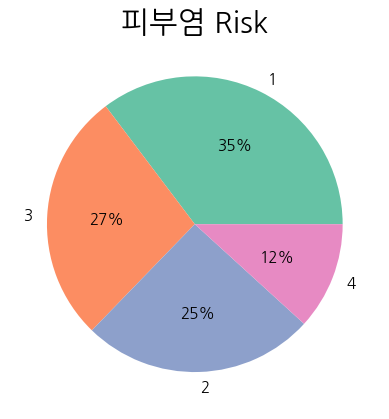

In [ ]:
risk = df4['risk'].value_counts()
plt.title("피부염 Risk")
plt.pie(x=risk, labels=risk.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 11});

# 피부염을 제외한 질병 대부분 risk 1, 2으로 예측됨 -> 계절의 영향 (3/10-12 기준으로 데이터 수집됨)

In [ ]:
# 합치기
df = pd.concat([df1,df2,df3,df4])
df.head()

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240310,11,0,18400,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
1,1,20240310,26,0,6708,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
2,1,20240310,27,0,3933,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
3,1,20240310,28,0,3827,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
4,1,20240310,29,0,3194,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dissCd        204 non-null    object
 1   dt            204 non-null    object
 2   znCd          204 non-null    object
 3   lowrnkZnCd    204 non-null    object
 4   cnt           204 non-null    int64 
 5   risk          204 non-null    int64 
 6   dissRiskXpln  204 non-null    object
dtypes: int64(2), object(5)
memory usage: 20.9+ KB


In [ ]:
# check for missing values
df_null = df.isnull()
print(df_null.sum())

dissCd          0
dt              0
znCd            0
lowrnkZnCd      0
cnt             0
risk            0
dissRiskXpln    0
dtype: int64


In [ ]:
count_disease = df.groupby("dissCd")['cnt'].agg(['mean','sum']).reset_index()
count_disease

,dissCd,mean,sum
0,1,40346.686275,2057681
1,2,3255.823529,166047
2,3,10009.352941,510477
3,4,3712.176471,189321


In [ ]:
count_znCd = df.groupby("znCd")['cnt'].agg(['mean','sum']).reset_index()
count_znCd

,znCd,mean,sum
0,11,19464.916667,233579
1,26,8775.250000,105303
2,27,5730.916667,68771
3,28,7109.583333,85315
4,29,3456.333333,41476
5,30,4065.583333,48787
6,31,3053.750000,36645
7,41,30414.583333,364975
8,42,3246.083333,38953
9,43,3737.166667,44846


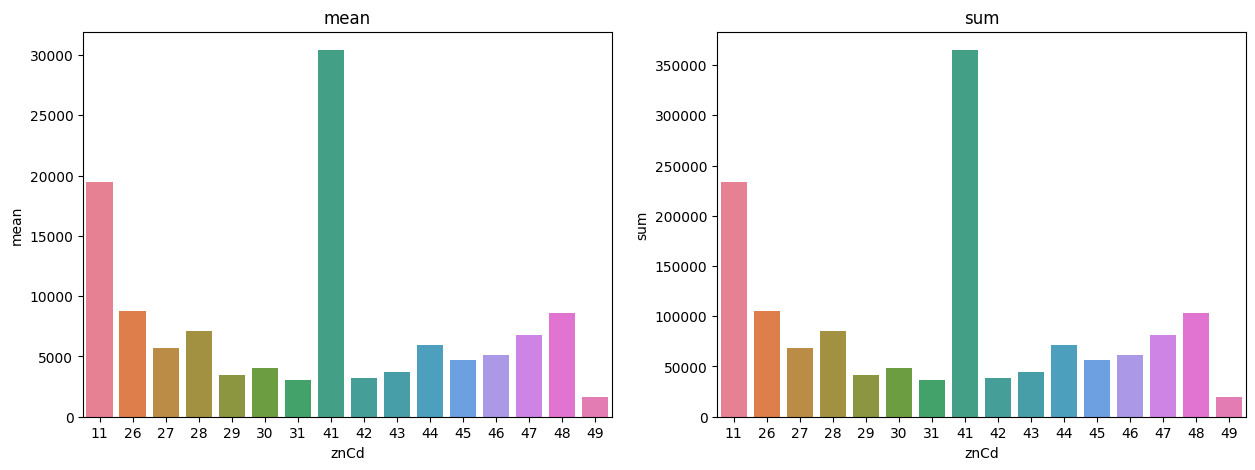

In [ ]:
plot = count_znCd[:16]
cols = ['mean','sum']

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
for i, cols in enumerate(cols):
  sns.barplot(plot, x='znCd', y=cols, hue='znCd', ax=axes[i]).set(title=cols);



---

### **건강보험심사평가원 병원정보서비스 api**

In [ ]:
# HIRA 병원정보
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = f'http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList?serviceKey={service_key}&numOfRows=10000&pageNo=1'
response = requests.get(url)
content = response.text
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

xml_obj = bs4.BeautifulSoup(content, 'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]

In [ ]:
#xml값 DataFrame으로 만들기
hosp_df = pd.DataFrame(row_list, columns=name_list)
print(hosp_df)

                                            addr clCd clCdNm cmdcGdrCnt  \
0                      경기도 수원시 팔달구 중부대로 93, (지동)   01   상급종합          0   
1                        인천광역시 부평구 동수로 56, (부평동)   01   상급종합          0   
2                  강원특별자치도 강릉시 사천면 방동길 38, (사천면)   01   상급종합          0   
3                        서울특별시 종로구 새문안로 29, (평동)   01   상급종합          0   
4                     서울특별시 광진구 능동로 120-1, (화양동)   01   상급종합          0   
...                                          ...  ...    ...        ...   
9995                    광주광역시 남구 서문대로 675, (진월동)   31     의원          0   
9996            제주특별자치도 제주시 1100로 3323, 4층 (노형동)   31     의원          0   
9997  경기도 부천시 원미구 길주로 183, 영라이프빌딩 601호,602호 (중동)   31     의원          0   
9998  경기도 성남시 분당구 황새울로335번길 5, 403호 (서현동, 엔타운빌딩)   31     의원          0   
9999             서울특별시 성동구 왕십리로 50, 지하1층 (성수동1가)   31     의원          0   

     cmdcIntnCnt cmdcResdntCnt cmdcSdrCnt detyGdrCnt detyIntnCnt  \
0              0             0 

In [ ]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   addr            10000 non-null  object
 1   clCd            10000 non-null  object
 2   clCdNm          10000 non-null  object
 3   cmdcGdrCnt      10000 non-null  object
 4   cmdcIntnCnt     10000 non-null  object
 5   cmdcResdntCnt   10000 non-null  object
 6   cmdcSdrCnt      10000 non-null  object
 7   detyGdrCnt      10000 non-null  object
 8   detyIntnCnt     10000 non-null  object
 9   detyResdntCnt   10000 non-null  object
 10  detySdrCnt      10000 non-null  object
 11  drTotCnt        10000 non-null  object
 12  emdongNm        10000 non-null  object
 13  estbDd          10000 non-null  object
 14  hospUrl         10000 non-null  object
 15  mdeptGdrCnt     10000 non-null  object
 16  mdeptIntnCnt    10000 non-null  object
 17  mdeptResdntCnt  10000 non-null  object
 18  mdeptSd

In [ ]:
columns = ['postNo','sgguCd','sgguCdNm','sidoCd','sidoCdNm']
for col in columns:
  print(col, ": ", hosp_df[col].unique())

postNo :  ['16247' '21431' '25440' ... '08745' '41938' '14537']
sgguCd :  ['310603' '220003' '320100' '110016' '110023' '230006' '380500' '110007'
 '230007' '110005' '311101' '210006' '340202' '230001' '부산서구' '310403'
 '110001' '310303' '310604' '381100' '320400' '110010' '350300' '220006'
 '110020' '부산진구' '220004' '110018' '240001' '350402' '110008' '250005'
 '330104' '230003' '250003' '110012' '울산동구' '110021' '380701' '310702'
 '110011' '360022' '220007' '220005' '312003' '대구수성구' '240004' '110013'
 '110015' '310800' '강남구' '312001' '대구동구' '110002' '320500' '320700'
 '320300' '320006' '김해시' '330200' '310602' '312400' '이천시' '312200'
 '312800' '380702' '370300' '370400' '370702' '대구중구' '310100' '360700'
 '240005' '광주북구' '광주광산구' '광주서구' '구로구' '370200' '부산북구' '성남분당구' '311903'
 '110017' '대전대덕구' '320200' '360400' '380705' '320600' '311102' '인천부평구'
 '서초구' '대구달서구' '나주시' '311500' '110022' '110019' '부천원미구' '당진시' '대구남구'
 '230004' '230002' '210003' '전주덕진구' '250002' '대전동구' '대전서구' '370100'
 '210100' 

In [ ]:
# 값이 column 방향으로 이동해야 하는 row 확인 -> sgguCd 가 문자형인 경우
hosp_df[pd.to_numeric(hosp_df.sgguCd, errors='coerce').isnull()].head(1)

,addr,clCd,clCdNm,cmdcGdrCnt,cmdcIntnCnt,cmdcResdntCnt,cmdcSdrCnt,detyGdrCnt,detyIntnCnt,detyResdntCnt,detySdrCnt,drTotCnt,emdongNm,estbDd,hospUrl,mdeptGdrCnt,mdeptIntnCnt,mdeptResdntCnt,mdeptSdrCnt,pnursCnt,postNo,sgguCd,sgguCdNm,sidoCd,sidoCdNm,telno,XPos,YPos,yadmNm,ykiho
15,"부산광역시 서구 구덕로 179, (아미동1가)",01,상급종합,0,0,0,0,2,1,2,10,485,아미동1가,19810827,1,37,162,270,0,49241,210006,부산서구,210000,부산,240-7000,129.0188032,35.1008477,부산대학교병원,JDQ4MTAxMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,None


In [ ]:
# Shift values to right
mask = hosp_df.index[pd.to_numeric(hosp_df.sgguCd, errors='coerce').isnull()]
hosp_df.loc[mask, 'hospUrl':] = hosp_df.loc[mask, 'hospUrl':].shift(axis=1)

In [ ]:
columns = columns[2:]
for col in columns:
  print(col, ": ", hosp_df[col].unique())

sgguCdNm :  ['수원팔달구' '인천부평구' '강릉시' '종로구' '광진구' '대구중구' '진주시' '동대문구' '대구달서구' '구로구'
 '안산단원구' '부산서구' '천안동남구' '대구남구' '성남분당구' '강남구' '부천원미구' '수원영통구' '양산시' '원주시'
 '서대문구' '익산시' '인천남동구' '양천구' '부산진구' '인천중구' '송파구' '광주동구' '전주덕진구' '동작구'
 '대전중구' '청주서원구' '대구북구' '대전서구' '성북구' '울산동구' '서초구' '창원마산회원구' '안양동안구' '성동구'
 '화순군' '인천연수구' '인천서구' '용인처인구' '대구수성구' '광주광산구' '영등포구' '은평구' '의정부시' '용인기흥구'
 '대구동구' '강동구' '춘천시' '삼척시' '속초시' '영월군' '김해시' '충주시' '수원장안구' '안성시' '이천시'
 '파주시' '포천시' '창원마산합포구' '김천시' '안동시' '포항북구' '광명시' '광양시' '광주남구' '광주북구' '광주서구'
 '구미시' '부산북구' '고양일산동구' '중구' '대전대덕구' '동해시' '순천시' '창원성산구' '태백시' '안산상록구'
 '나주시' '남양주시' '노원구' '중랑구' '당진시' '대구서구' '부산동래구' '대전동구' '경주시' '부산기장군' '목포시'
 '강서구' '부산연제구' '부산남구' '부안군' '부천소사구' '부천오정구' '인천강화군' '부산수영구' '상주시' '통영시'
 '서산시' '울산울주군' '성남수정구' '성남중원구' '세종시' '용산구' '아산시' '포항남구' '여수시' '창원진해구'
 '영광군' '영천시' '부산영도구' '영주시' '오산시' '울산남구' '울산북구' '군포시' '평택시' '거제시' '진천군'
 '경산시' '시흥시' '울산중구' '수원권선구' '제천시' '논산시' '인천동구' '천안서북구' '예산군' '군산시' '장흥군'
 '화성시' '부산해운대구' '인천미추홀구' '청주상당구' '제주시' '옥천군' '무안군' '문경시

In [ ]:
# 값이 column 방향으로 이동해야 하는 row 확인 -> sidoCd 가 문자형인 경우
hosp_df[pd.to_numeric(hosp_df.sidoCd, errors='coerce').isnull()].head(1)

,addr,clCd,clCdNm,cmdcGdrCnt,cmdcIntnCnt,cmdcResdntCnt,cmdcSdrCnt,detyGdrCnt,detyIntnCnt,detyResdntCnt,detySdrCnt,drTotCnt,emdongNm,estbDd,hospUrl,mdeptGdrCnt,mdeptIntnCnt,mdeptResdntCnt,mdeptSdrCnt,pnursCnt,postNo,sgguCd,sgguCdNm,sidoCd,sidoCdNm,telno,XPos,YPos,yadmNm,ykiho
179,"세종특별자치시 보듬7로 20, 세종충남대학교병원 (도담동)",11,종합병원,0,0,0,0,0,0,0,2,136,20200623,0,0,0,134,0,30099,410000,세종시,410000,세종시,1800-3114,127.2579427,36.5195133,세종충남대학교병원,JDQ4MTYyMiM2MSMkMSMkMiMkODkkMzgxMzUxIzExIyQxIy...,None,None


In [ ]:
# Shift values to right
mask = hosp_df.index[pd.to_numeric(hosp_df.sidoCd, errors='coerce').isnull()]
hosp_df.loc[mask, 'estbDd':] = hosp_df.loc[mask, 'estbDd':].shift(periods=2, axis=1)
hosp_df.loc[mask, 'emdongNm':'estbDd'] = hosp_df.loc[mask, 'emdongNm':'estbDd'].shift(axis=1)

In [ ]:
for col in columns:
  print(col, ": ", hosp_df[col].unique())

sgguCdNm :  ['수원팔달구' '인천부평구' '강릉시' '종로구' '광진구' '대구중구' '진주시' '동대문구' '대구달서구' '구로구'
 '안산단원구' '부산서구' '천안동남구' '대구남구' '성남분당구' '강남구' '부천원미구' '수원영통구' '양산시' '원주시'
 '서대문구' '익산시' '인천남동구' '양천구' '부산진구' '인천중구' '송파구' '광주동구' '전주덕진구' '동작구'
 '대전중구' '청주서원구' '대구북구' '대전서구' '성북구' '울산동구' '서초구' '창원마산회원구' '안양동안구' '성동구'
 '화순군' '인천연수구' '인천서구' '용인처인구' '대구수성구' '광주광산구' '영등포구' '은평구' '의정부시' '용인기흥구'
 '대구동구' '강동구' '춘천시' '삼척시' '속초시' '영월군' '김해시' '충주시' '수원장안구' '안성시' '이천시'
 '파주시' '포천시' '창원마산합포구' '김천시' '안동시' '포항북구' '광명시' '광양시' '광주남구' '광주북구' '광주서구'
 '구미시' '부산북구' '고양일산동구' '중구' '대전대덕구' '동해시' '순천시' '창원성산구' '태백시' '안산상록구'
 '나주시' '남양주시' '노원구' '중랑구' '당진시' '대구서구' '부산동래구' '대전동구' '경주시' '부산기장군' '목포시'
 '강서구' '부산연제구' '부산남구' '부안군' '부천소사구' '부천오정구' '인천강화군' '부산수영구' '상주시' '통영시'
 '서산시' '울산울주군' '성남수정구' '성남중원구' '세종시' '용산구' '아산시' '포항남구' '여수시' '창원진해구'
 '영광군' '영천시' '부산영도구' '영주시' '오산시' '울산남구' '울산북구' '군포시' '평택시' '거제시' '진천군'
 '경산시' '시흥시' '울산중구' '수원권선구' '제천시' '논산시' '인천동구' '천안서북구' '예산군' '군산시' '장흥군'
 '화성시' '부산해운대구' '인천미추홀구' '청주상당구' '제주시' '옥천군' '무안군' '문경시

In [ ]:
hosp_df['sidoCd'] = hosp_df['sidoCd'].str[:2]
print("Unique sidoCd:\n", hosp_df['sidoCd'].unique())

Unique sidoCd:
 ['31' '22' '32' '11' '23' '38' '21' '34' '35' '24' '25' '33' '26' '36'
 '37' '41' '39']


In [ ]:
labels

array(['경기', '인천', '강원', '서울', '대구', '경남', '부산', '충남', '전북', '광주', '대전',
       '충북', '울산', '전남', '경북', '세종시', '제주'], dtype=object)

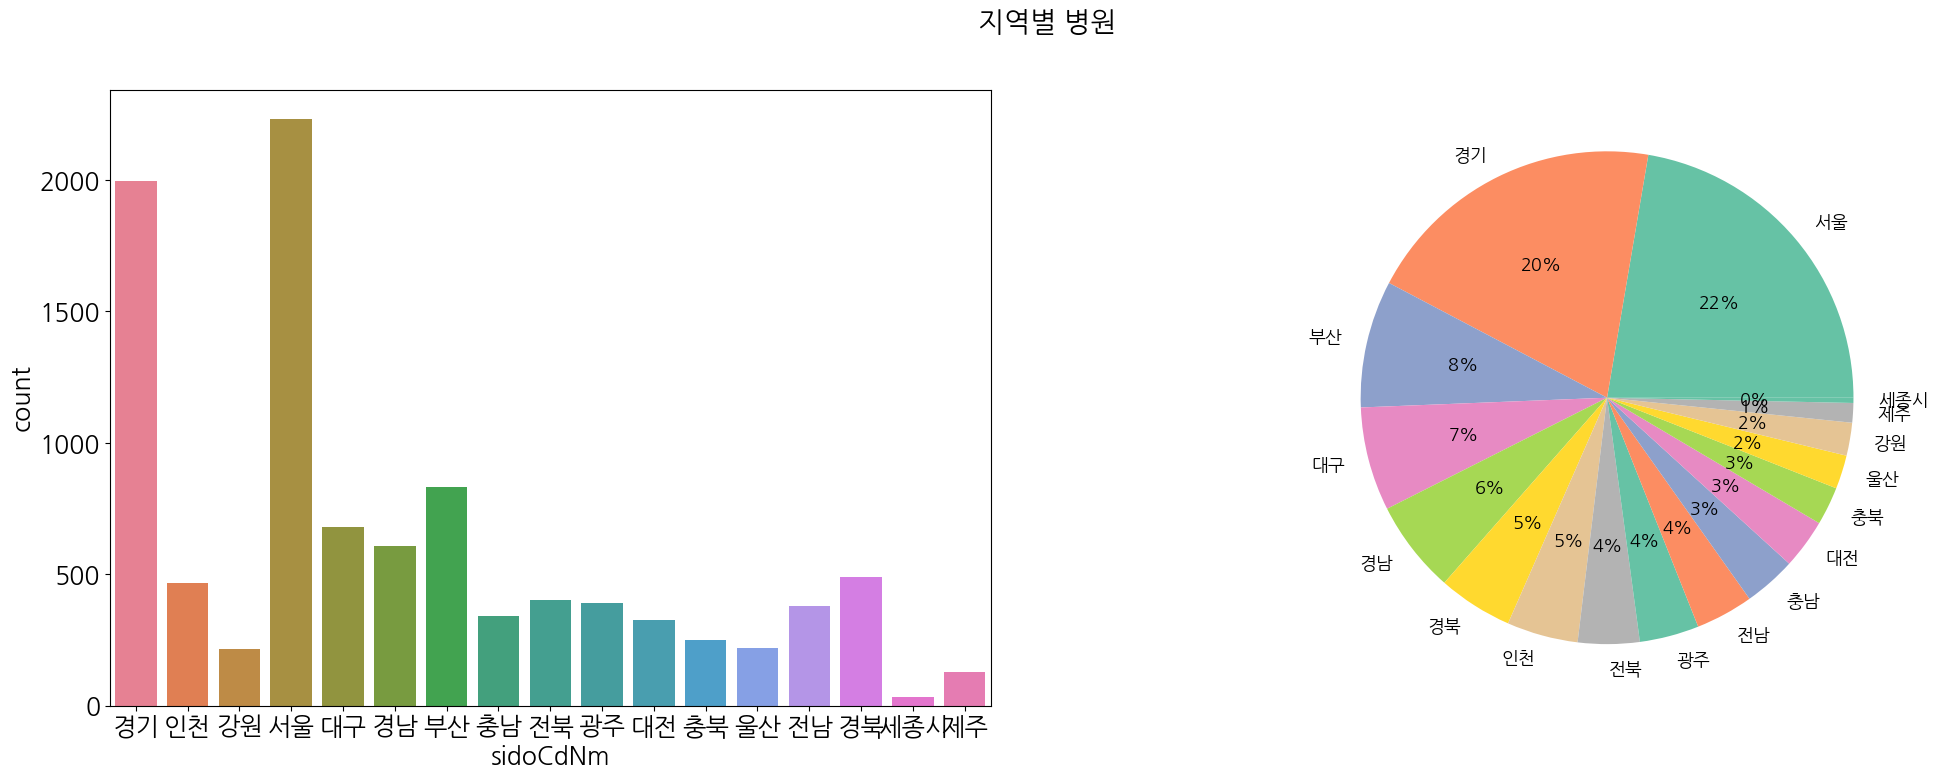

In [ ]:
hosp_sido = hosp_df['sidoCdNm'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

sns.countplot(data=hosp_df, x='sidoCdNm', hue='sidoCdNm', ax=axes[0])
axes[1] = plt.pie(x=hosp_sido, labels=hosp_sido.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 13})
fig.suptitle('지역별 병원', fontsize=20);
# 경기, 서울 -> 전체의 42% 차지하고 있음 (수도권 쏠림현상)
# 부산 -> 대구 -> 경남 -> 경북 순으로 뒤따르고 있음
# 전라도, 충청도 -> 의료취약지역

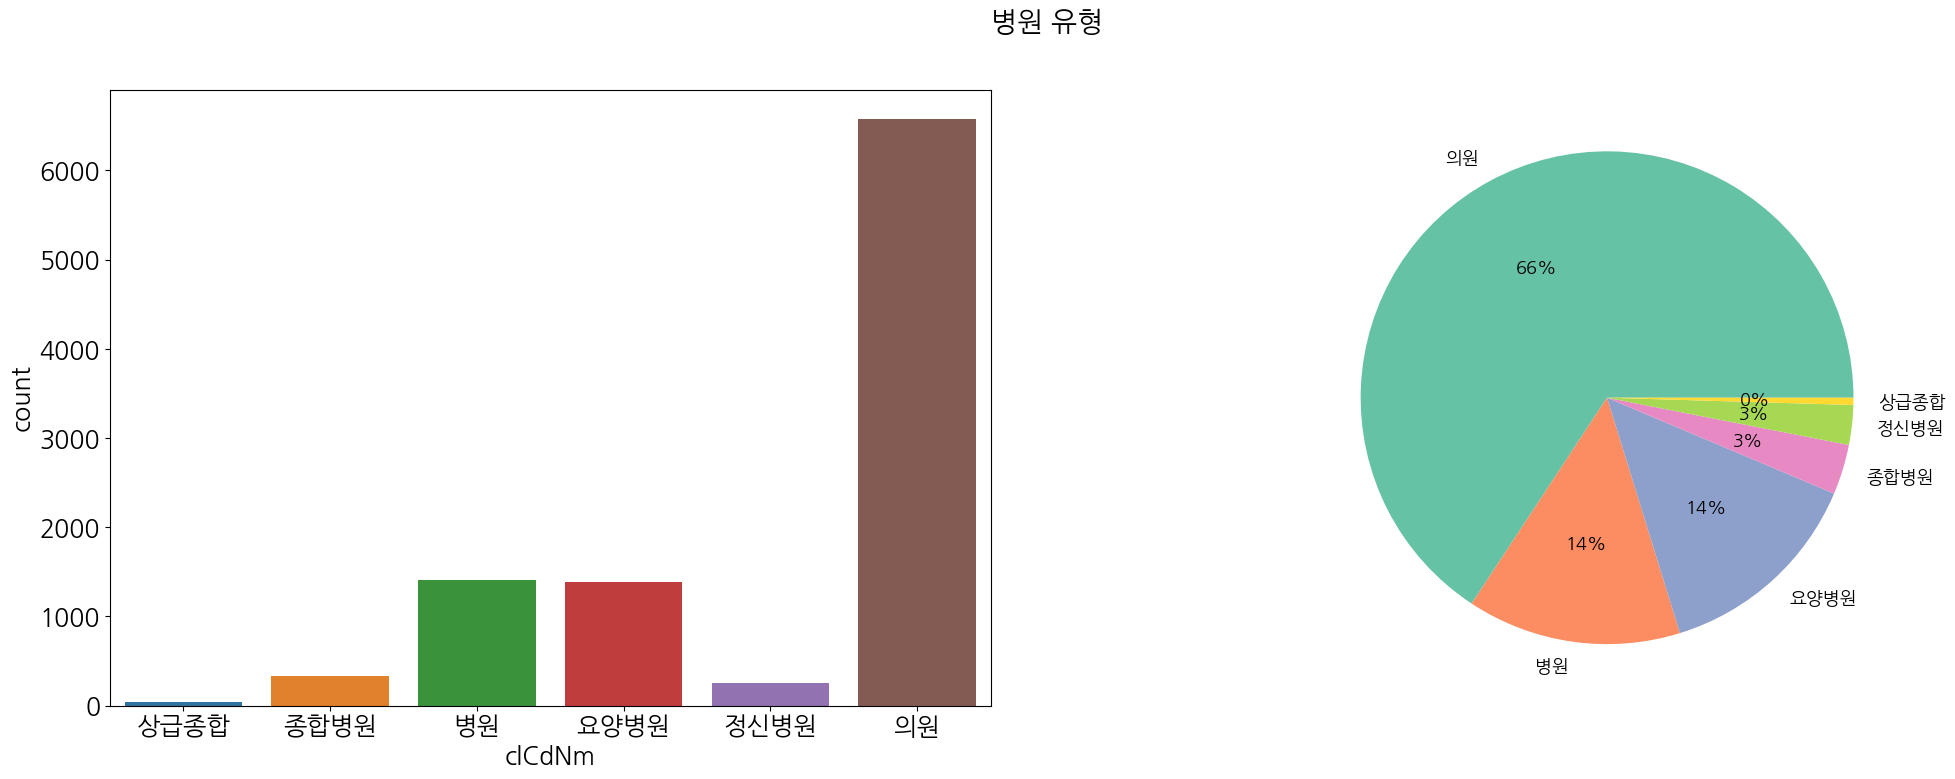

In [ ]:
hosp_type = hosp_df['clCdNm'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

sns.countplot(data=hosp_df, x='clCdNm', hue='clCdNm', ax=axes[0])
axes[1] = plt.pie(x=hosp_type, labels=hosp_type.index, colors=sns.color_palette('Set2'), autopct='%.0f%%', textprops={'fontsize': 13})
fig.suptitle('병원 유형', fontsize=20);

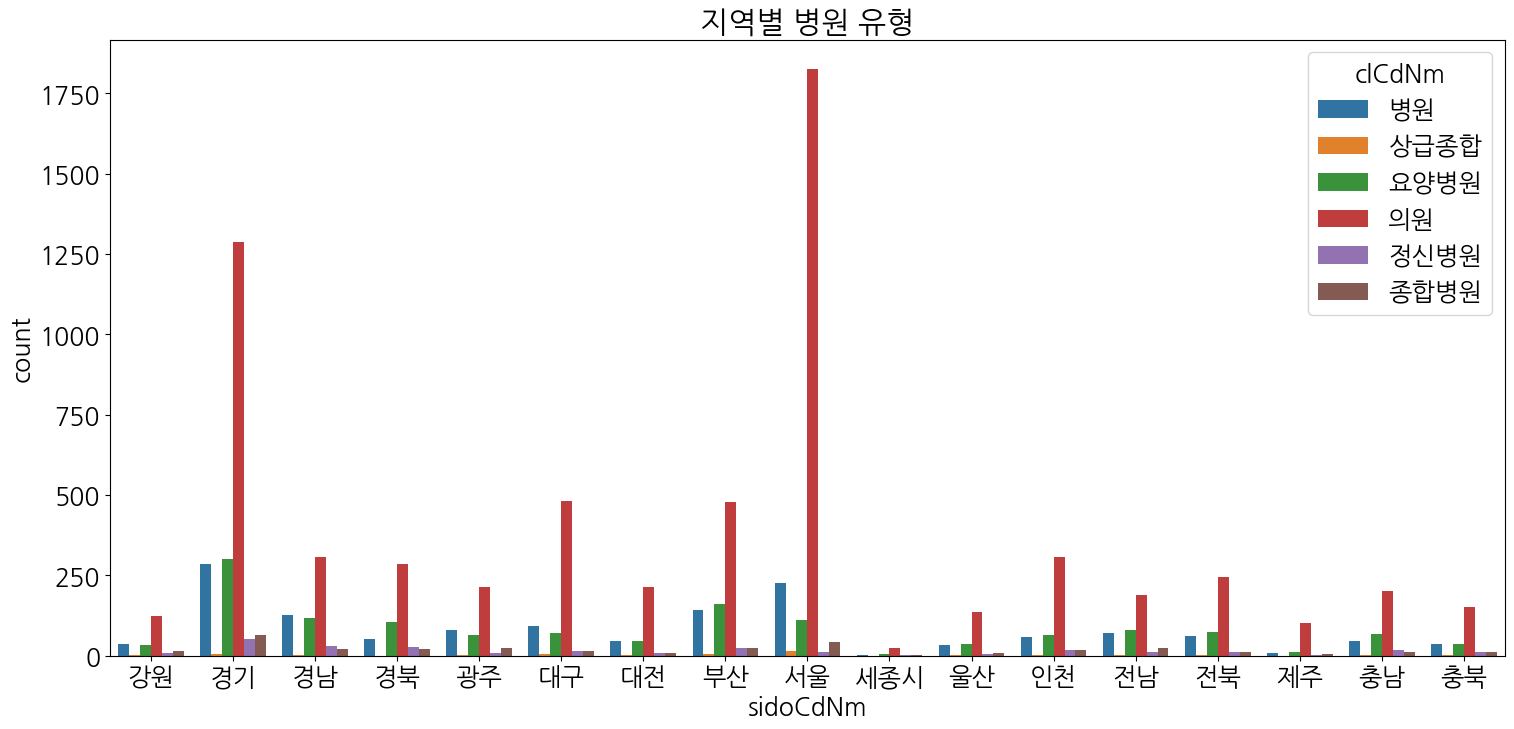

In [ ]:
df_size = hosp_df.groupby(['sidoCdNm','clCdNm']).size().reset_index()
df_size.columns = ['sidoCdNm','clCdNm','count']

plt.figure(figsize=(18,8))
sns.barplot(data=df_size, x='sidoCdNm', y='count', hue='clCdNm').set(title='지역별 병원 유형');

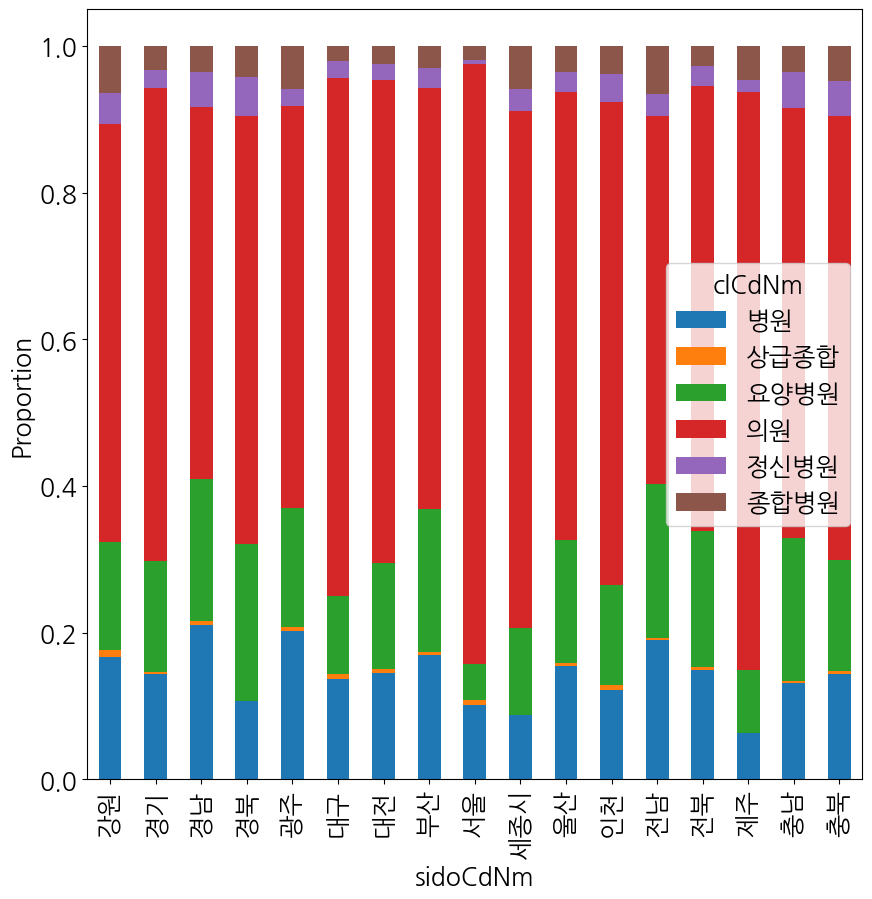

In [ ]:
cross_tab_prob = pd.crosstab(index=hosp_df['sidoCdNm'], columns=hosp_df['clCdNm'], normalize='index')
cross_tab = pd.crosstab(index=hosp_df['sidoCdNm'], columns=hosp_df['clCdNm'])

cross_tab_prob.plot(kind="bar", stacked=True, figsize=(10,10))
plt.ylabel('Proportion');
# 모든 지역에서 의원(빨강)이 가장 많았으며, 그 다음으로 병원(파랑), 요양병원(초록) 순으로 많음


---
### NHIS-HIRA 합치기



In [ ]:
pip install PublicDataReader --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.2 MB/s eta 0:00:00


In [ ]:
import PublicDataReader as pdr

sgg_code = pdr.code_hdong_bdong()
sgg_code.head()

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024.2.1. 시행)


,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,법정동코드,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,1100000000,서울특별시,19880423,
1,11,서울특별시,11110,종로구,1111000000,,1111000000,종로구,19880423,
2,11,서울특별시,11110,종로구,1111000000,,1111090100,창신1동,19880423,19880423
3,11,서울특별시,11110,종로구,1111000000,,1111090200,창신2동,19880423,19880423
4,11,서울특별시,11110,종로구,1111000000,,1111090300,창신3동,19880423,19880423


In [ ]:
sgg_code["sgg_code"] = sgg_code["시도명"].str[] + sgg_code["시군구명"]

,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,법정동코드,동리명,생성일자,말소일자
5121,28,인천광역시,28000,,2800000000,,2800000000,인천광역시,19950101,
5122,28,인천광역시,28110,중구,2811000000,,2811000000,중구,19950101,
5123,28,인천광역시,28110,중구,2811051000,중앙동,2811010100,중앙동1가,19950101,19981010
5124,28,인천광역시,28110,중구,2811051000,중앙동,2811010200,중앙동2가,19950101,19981010
5125,28,인천광역시,28110,중구,2811051000,중앙동,2811010300,중앙동3가,19950101,19981010
...,...,...,...,...,...,...,...,...,...,...
5745,28,인천광역시,28720,옹진군,2872037000,자월면,2872037022,이작리,19950301,
5746,28,인천광역시,28720,옹진군,2872037000,자월면,2872037023,승봉리,19950301,
5747,28,인천광역시,28720,옹진군,2872037500,자월면이작출장소,2872037022,이작리,20190208,
5748,28,인천광역시,28720,옹진군,2872038000,연평면,2872038000,연평면,19990720,
